In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('/home/carlo/workspace/networkqit/')
import numpy as np
import networkqit as nq
import networkx as nx
from numpy.random import random as rand
from networkqit import graph_laplacian as GL
from scipy.linalg import eigvalsh
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [94]:
G = nx.karate_club_graph()
Astar = nx.to_numpy_array(G)
k = Astar.sum(axis=0).astype(int)
Lstar = nq.graph_laplacian(Astar)
pstar = nx.density(G)
N = len(G.nodes())
M=nq.UBCM(N=N)

In [95]:
optimizer = nq.MLEOptimizer(A=Astar,x0=np.random.random(N))
sol = optimizer.runfsolve(model='UBCM')

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


In [110]:
beta_range=np.logspace(3,-3,20)

In [131]:
optimizer = nq.ExpectedModelOptimizer(A=Astar,beta_range=beta_range,x0=sol)
optimizer.setup(expected_adj_fun=M,expected_lapl_grad_fun=M.expected_laplacian_grad)
solspectral2 = optimizer.run(method='L-BFGS-B')

In [ ]:
solspectral2ls = optimizer.run(method='least_squares')

In [134]:
cmap = sns.color_palette('viridis',len(beta_range))

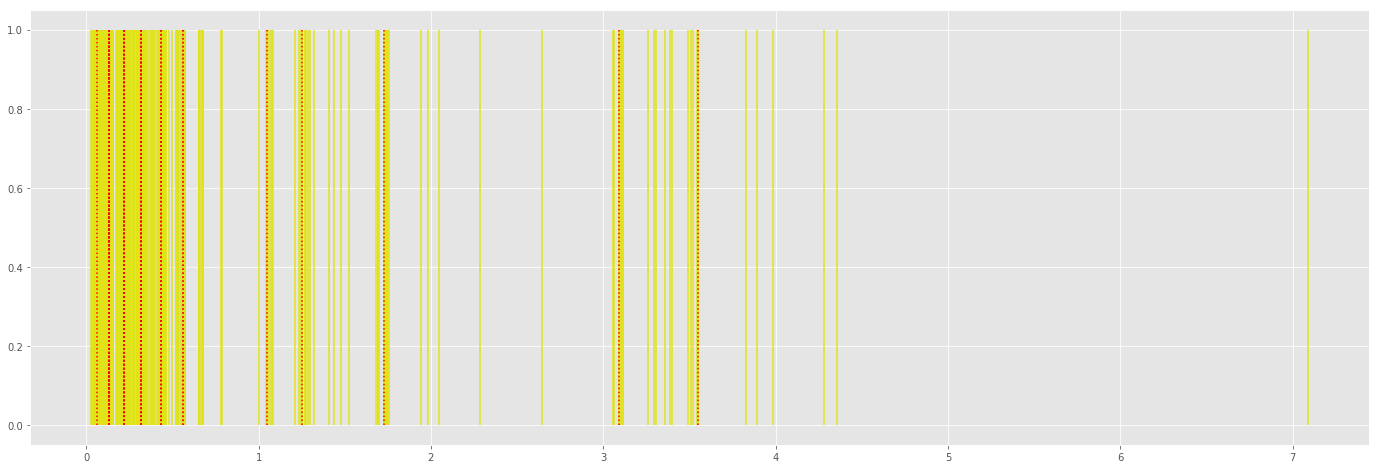

In [137]:
plt.figure(figsize=(24,8))
for i,beta in enumerate(beta_range):
    plt.vlines(solspectral2[i].x,ymin=0,ymax=1,color=cmap[-1])
    
for i in range(0,len(sol)):
    plt.vlines(sol[i],ymin=0,ymax=1,color='r',linestyle='dotted')

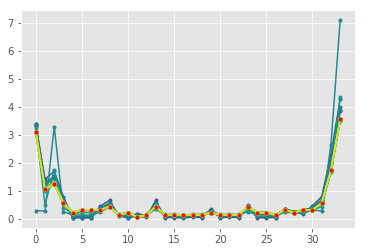

In [139]:
for i,beta in enumerate(beta_range):
    plt.plot(solspectral2[i].x, color=cmap[i],marker='.')
    
for i in range(0,len(sol)):
    plt.plot(i,sol[i], 'r.-')

In [120]:
np.sum(M(solspectral[-1].x)),np.sum(M(sol))
(nq.SpectralDivergence(Lobs=Lstar, Lmodel=nq.graph_laplacian(M(solspectral[-1].x)) , beta=1E-3).rel_entropy,
 nq.SpectralDivergence(Lobs=Lstar, Lmodel=nq.graph_laplacian(M(sol)) , beta=1E-3).rel_entropy)

(1.3006904621359894e-05, 1.5577470291461282e-06)

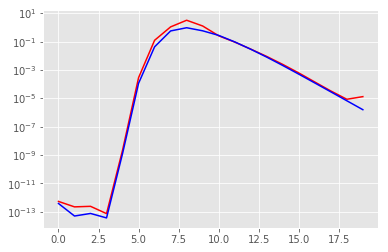

In [132]:
plt.loglog(beta_range,[solspectral[i].rel_entropy for i in range(0,len(beta_range))],'-r')
plt.loglog(beta_range,[solspectral2[i].rel_entropy for i in range(0,len(beta_range))],'-b')
plt.loglog(beta_range,[solspectral2ls[i].rel_entropy for i in range(0,len(beta_range))],'-g')